In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def periodic(coords, vecs):
    # Centre
    initial = coords
    # Positions middle
    left = initial.copy()
    left['X'] = left['X'] - vecs.iloc[0, 0]
    left['Y'] = left['Y'] - vecs.iloc[0, 1]
    left['Z'] = left['Z'] - vecs.iloc[0, 2]

    right = initial.copy()
    right['X'] = right['X'] + vecs.iloc[0, 0]
    right['Y'] = right['Y'] + vecs.iloc[0, 1]
    right['Z'] = right['Z'] + vecs.iloc[0, 2]

    front = initial.copy()
    front['X'] = front['X'] - vecs.iloc[2, 0]
    front['Y'] = front['Y'] - vecs.iloc[2, 1]
    front['Z'] = front['Z'] - vecs.iloc[2, 2]

    lfront = front.copy()
    lfront['X'] = lfront['X'] - vecs.iloc[0, 0]
    lfront['Y'] = lfront['Y'] - vecs.iloc[0, 1]
    lfront['Z'] = lfront['Z'] - vecs.iloc[0, 2]

    rfront = front.copy()
    rfront['X'] = rfront['X'] + vecs.iloc[0, 0]
    rfront['Y'] = rfront['Y'] + vecs.iloc[0, 1]
    rfront['Z'] = rfront['Z'] + vecs.iloc[0, 2]

    back = initial.copy()
    back['X'] = back['X'] + vecs.iloc[2, 0]
    back['Y'] = back['Y'] + vecs.iloc[2, 1]
    back['Z'] = back['Z'] + vecs.iloc[2, 2]

    lback = back.copy()
    lback['X'] = lback['X'] - vecs.iloc[0, 0]
    lback['Y'] = lback['Y'] - vecs.iloc[0, 1]
    lback['Z'] = lback['Z'] - vecs.iloc[0, 2]

    rback = back.copy()
    rback['X'] = rback['X'] + vecs.iloc[0, 0]
    rback['Y'] = rback['Y'] + vecs.iloc[0, 1]
    rback['Z'] = rback['Z'] + vecs.iloc[0, 2]

    # Top row
    up = initial.copy()
    up['X'] = up['X'] + vecs.iloc[1, 0]
    up['Y'] = up['Y'] + vecs.iloc[1, 1]
    up['Z'] = up['Z'] + vecs.iloc[1, 2]

    upleft = up.copy()
    upleft['X'] = upleft['X'] - vecs.iloc[0, 0]
    upleft['Y'] = upleft['Y'] - vecs.iloc[0, 1]
    upleft['Z'] = upleft['Z'] - vecs.iloc[0, 2]

    upright = up.copy()
    upright['X'] = upright['X'] + vecs.iloc[0, 0]
    upright['Y'] = upright['Y'] + vecs.iloc[0, 1]
    upright['Z'] = upright['Z'] + vecs.iloc[0, 2]

    upfront = up.copy()
    upfront['X'] = upfront['X'] - vecs.iloc[2, 0]
    upfront['Y'] = upfront['Y'] - vecs.iloc[2, 1]
    upfront['Z'] = upfront['Z'] - vecs.iloc[2, 2]

    uplfront = upfront.copy()
    uplfront['X'] = uplfront['X'] - vecs.iloc[0, 0]
    uplfront['Y'] = uplfront['Y'] - vecs.iloc[0, 1]
    uplfront['Z'] = uplfront['Z'] - vecs.iloc[0, 2]

    uprfront = upfront.copy()
    uprfront['X'] = uprfront['X'] + vecs.iloc[0, 0]
    uprfront['Y'] = uprfront['Y'] + vecs.iloc[0, 1]
    uprfront['Z'] = uprfront['Z'] + vecs.iloc[0, 2]

    upback = up.copy()
    upback['X'] = upback['X'] + vecs.iloc[2, 0]
    upback['Y'] = upback['Y'] + vecs.iloc[2, 1]
    upback['Z'] = upback['Z'] + vecs.iloc[2, 2]

    uplback = upback.copy()
    uplback['X'] = uplback['X'] - vecs.iloc[0, 0]
    uplback['Y'] = uplback['Y'] - vecs.iloc[0, 1]
    uplback['Z'] = uplback['Z'] - vecs.iloc[0, 2]

    uprback = upback.copy()
    uprback['X'] = uprback['X'] + vecs.iloc[0, 0]
    uprback['Y'] = uprback['Y'] + vecs.iloc[0, 1]
    uprback['Z'] = uprback['Z'] + vecs.iloc[0, 2]

    # Bottom row
    down = initial.copy()
    down['X'] = down['X'] - vecs.iloc[1, 0]
    down['Y'] = down['Y'] - vecs.iloc[1, 1]
    down['Z'] = down['Z'] - vecs.iloc[1, 2]

    downleft = down.copy()
    downleft['X'] = downleft['X'] - vecs.iloc[0, 0]
    downleft['Y'] = downleft['Y'] - vecs.iloc[0, 1]
    downleft['Z'] = downleft['Z'] - vecs.iloc[0, 2]

    downright = down.copy()
    downright['X'] = downright['X'] + vecs.iloc[0, 0]
    downright['Y'] = downright['Y'] + vecs.iloc[0, 1]
    downright['Z'] = downright['Z'] + vecs.iloc[0, 2]

    downfront = down.copy()
    downfront['X'] = downfront['X'] - vecs.iloc[2, 0]
    downfront['Y'] = downfront['Y'] - vecs.iloc[2, 1]
    downfront['Z'] = downfront['Z'] - vecs.iloc[2, 2]

    downlfront = downfront.copy()
    downlfront['X'] = downlfront['X'] - vecs.iloc[0, 0]
    downlfront['Y'] = downlfront['Y'] - vecs.iloc[0, 1]
    downlfront['Z'] = downlfront['Z'] - vecs.iloc[0, 2]

    downrfront = downfront.copy()
    downrfront['X'] = downrfront['X'] + vecs.iloc[0, 0]
    downrfront['Y'] = downrfront['Y'] + vecs.iloc[0, 1]
    downrfront['Z'] = downrfront['Z'] + vecs.iloc[0, 2]

    downback = down.copy()
    downback['X'] = downback['X'] + vecs.iloc[2, 0]
    downback['Y'] = downback['Y'] + vecs.iloc[2, 1]
    downback['Z'] = downback['Z'] + vecs.iloc[2, 2]

    downlback = downback.copy()
    downlback['X'] = downlback['X'] - vecs.iloc[0, 0]
    downlback['Y'] = downlback['Y'] - vecs.iloc[0, 1]
    downlback['Z'] = downlback['Z'] - vecs.iloc[0, 2]

    downrback = downback.copy()
    downrback['X'] = downrback['X'] + vecs.iloc[0, 0]
    downrback['Y'] = downrback['Y'] + vecs.iloc[0, 1]
    downrback['Z'] = downrback['Z'] + vecs.iloc[0, 2]

    super_cell = pd.concat([uplfront, upfront, uprfront, upleft, up, upright, uplback, upback, uprback,
                            lfront, front, rfront, left, initial, right, lback, back, rback,
                            downlfront, downfront, downrfront, downleft, down, downright, downlback, downback,
                            downrback],
                           axis=0, ignore_index=True)

    return super_cell


meta = pd.read_csv("jmol_xyz.mol",
                   delim_whitespace=True,
                   skiprows=5,
                   header=None,
                   nrows=1,
                   names=['A', 'B', 'C', 'Atoms', 'Bonds', 'D', 'E', 'F'])
meta = meta.drop(labels=['A', 'B', 'C', 'D', 'E', 'F'],
                 axis=1)
xyz_atoms = pd.read_csv("jmol_xyz.mol",
                        delim_whitespace=True,
                        skiprows=7,
                        header=None,
                        names=['A', 'B', 'C', 'Atom', 'X', 'Y', 'Z', 'D', 'E', 'F', 'G', 'H'],
                        nrows=meta.iloc[0, 0])
xyz_atoms = xyz_atoms.drop(labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                           axis=1)
xyz_bonds = pd.read_csv("jmol_xyz.mol",
                        delim_whitespace=True,
                        skiprows=7 + meta.iloc[0, 0] + 2,
                        header=None,
                        names=['A', 'B', 'C', 'D', 'Atom1', 'Atom2'],
                        nrows=meta.iloc[0, 1],
                        engine='python')
xyz_bonds = xyz_bonds.drop(labels=['A', 'B', 'C', 'D'],
                           axis=1)
vectors = pd.DataFrame([[35.4138000000, 0.0000000000, 0.0000000000],
                        [-1.7972342519, 39.7604017842, 0.0000000000],
                        [-5.7341619914, -2.8978936073, 50.9504135813]],
                       columns=['a', 'b', 'c'])
big_xyz = periodic(xyz_atoms, vectors)

big_meta = pd.read_csv("jmol_big_xyz.mol", 
                       delim_whitespace=True, skiprows=5, header=None, nrows=1,
                       names=['A', 'B', 'C', 'Atoms', 'Bonds', 'D', 'E', 'F'])
big_meta = big_meta.drop(labels=['A', 'B', 'C', 'D', 'E', 'F'], axis=1)
big_xyz_atom = pd.read_csv("jmol_big_xyz.mol", 
                           delim_whitespace=True, skiprows=7, header=None,
                           names=['A', 'B', 'C', 'Atom', 'X', 'Y', 'Z', 'D', 'E', 'F', 'G', 'H'],
                           nrows=big_meta.iloc[0, 0])
big_xyz_atom = big_xyz_atom.drop(labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], axis=1)
big_xyz_bonds = pd.read_csv("jmol_big_xyz.mol", 
                            delim_whitespace=True, skiprows=7 + big_meta.iloc[0, 0] + 2, header=None,
                            names=['A', 'B', 'C', 'D', 'Atom1', 'Atom2'],
                            nrows=big_meta.iloc[0, 1], engine='python')
big_xyz_bonds = big_xyz_bonds.drop(labels=['A', 'B', 'C', 'D'], axis=1)
big_xyz_bonds['Atom1'] = big_xyz_bonds['Atom1'] - 1
big_xyz_bonds['Atom2'] = big_xyz_bonds['Atom2'] - 1
bonds = big_xyz_bonds.merge(big_xyz_atom,
                            how='left',
                            left_on='Atom1',
                            right_index=True)
bonds = bonds.drop(['X', 'Y', 'Z'],
                   axis=1)
bonds = bonds.merge(big_xyz_atom,
                    how='left',
                    left_on='Atom2',
                    right_index=True)
bonds = bonds.drop(['X', 'Y', 'Z'],
                   axis=1)
bonds.columns = ['Atom1', 'Atom2', 'Atom1Name', 'Atom2Name']
G = nx.from_pandas_edgelist(big_xyz_bonds,
                            source='Atom1',
                            target='Atom2')
molecules = list(G.subgraph(c) for c in nx.connected_components(G))
molslist = []
for molecule in range(len(molecules)):
    molslist.append((molecule, list(molecules[molecule].nodes)))
slist = []
for i, n in molslist:
    molseries = pd.Series(data=i,
                          name='MOL',
                          index=n)
    slist.append(molseries)
molsdf = pd.concat(slist)
molsdf = molsdf.to_frame(name='MOL')
big_xyz_atom = big_xyz_atom.merge(molsdf,
                                  right_index=True,
                                  left_index=True,
                                  how='left')
shared = pd.merge(big_xyz_atom, xyz_atoms, how='inner', on=['X', 'Y', 'Z'])
shared.drop(['Atom_y'], axis=1, inplace=True)

In [3]:
shared.rename(columns={'Atom_x': 'Atom'}, inplace=True)

In [4]:
print('Difference between xyz_atoms and shared =', len(xyz_atoms) - len(shared))

Difference between xyz_atoms and shared = 191


In [5]:
len(xyz_atoms)

6858

In [6]:
len(big_xyz_atom)

185166

In [7]:
6858 * 27

185166

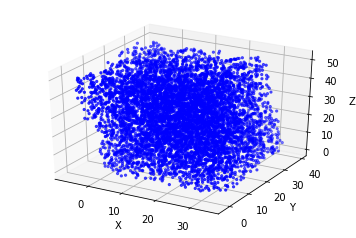

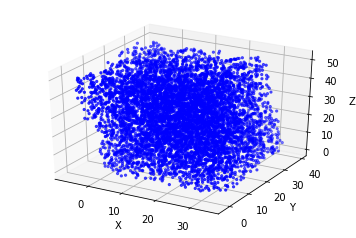

In [11]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(
    xyz_atoms.X, xyz_atoms.Y, xyz_atoms.Z,
    marker='.',
    color='b'
)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig1

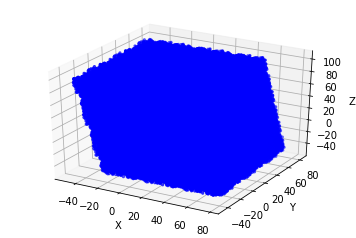

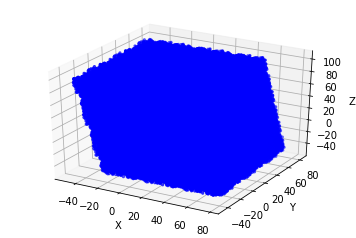

In [12]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(
    big_xyz_atom.X, big_xyz_atom.Y, big_xyz_atom.Z,
    marker='.',
    color='b'
)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
fig2

In [13]:
shared.head(10)

,Atom,X,Y,Z,MOL
0,O,19.33194,26.15457,32.62148,10093.0
1,O,17.79920,20.15763,32.41217,10093.0
2,N,20.00595,20.58139,32.51487,10093.0
3,C,19.93230,22.00822,32.51547,10093.0
4,C,18.96119,22.57193,33.30581,10093.0
5,C,18.75888,23.93910,33.37109,10093.0
6,C,19.53282,24.80804,32.53978,10093.0
7,C,20.43381,24.25940,31.64136,10093.0
8,C,20.73412,22.85062,31.71175,10093.0
9,C,18.96849,19.74722,32.39566,10093.0


In [14]:
xyz_atoms.head(10)

,Atom,X,Y,Z
0,O,19.33194,26.15457,32.62148
1,O,17.79920,20.15763,32.41217
2,N,20.00595,20.58139,32.51487
3,C,19.93230,22.00822,32.51547
4,C,18.96119,22.57193,33.30581
5,C,18.75888,23.93910,33.37109
6,C,19.53282,24.80804,32.53978
7,C,20.43381,24.25940,31.64136
8,C,20.73412,22.85062,31.71175
9,C,18.96849,19.74722,32.39566


In [23]:
missing = pd.merge(shared, xyz_atoms, how='outer', on=['X', 'Y', 'Z'], indicator=True)

In [24]:
missing.head(10)

,Atom_x,X,Y,Z,MOL,Atom_y,_merge
0,O,19.33194,26.15457,32.62148,10093.0,O,both
1,O,17.79920,20.15763,32.41217,10093.0,O,both
2,N,20.00595,20.58139,32.51487,10093.0,N,both
3,C,19.93230,22.00822,32.51547,10093.0,C,both
4,C,18.96119,22.57193,33.30581,10093.0,C,both
5,C,18.75888,23.93910,33.37109,10093.0,C,both
6,C,19.53282,24.80804,32.53978,10093.0,C,both
7,C,20.43381,24.25940,31.64136,10093.0,C,both
8,C,20.73412,22.85062,31.71175,10093.0,C,both
9,C,18.96849,19.74722,32.39566,10093.0,C,both


In [17]:
len(missing)

6858

In [18]:
len(xyz_atoms)

6858

In [25]:
missing_atoms = missing[missing['_merge'] == 'right_only']

In [26]:
missing_atoms

,Atom_x,X,Y,Z,MOL,Atom_y,_merge
6667,NaN,24.59723,24.07256,43.91484,NaN,H,right_only
6668,NaN,17.89639,25.04246,26.16756,NaN,H,right_only
6669,NaN,13.00086,26.95859,25.57792,NaN,H,right_only
6670,NaN,0.44216,20.62643,30.73581,NaN,C,right_only
6671,NaN,11.67229,19.93862,29.56001,NaN,H,right_only
6672,NaN,7.29263,22.67521,29.02358,NaN,H,right_only
6673,NaN,0.46325,26.31344,38.41487,NaN,H,right_only
6674,NaN,-0.38554,26.48522,40.30883,NaN,H,right_only
6675,NaN,0.93619,24.71663,32.07401,NaN,C,right_only
6676,NaN,0.22573,23.96416,32.43778,NaN,H,right_only


In [21]:
len(shared)

6667

In [22]:
missing.groupby('MOL').count()

,Atom_x,X,Y,Z,Atom_y
MOL,,,,,
1178.0,1,1,1,1,1
1214.0,8,8,8,8,8
1223.0,3,3,3,3,3
1240.0,1,1,1,1,1
1252.0,2,2,2,2,2
2794.0,1,1,1,1,1
3075.0,5,5,5,5,5
3289.0,8,8,8,8,8
3296.0,2,2,2,2,2
